# The tissues 3D reconstruction

This notebook demonstrates the process of tissues 3D reconstruction based on whole body 3D point cloud model. This is done in the following four steps.
1. Extract the 3D point cloud model of each tissue by the groups label；
2. (Optionally) Trim the original 3D point cloud model;
3. Construct the surface mesh based on the 3D point cloud;
4. Construct the volume based on the surface mesh.

### Packages

In [20]:
import os
import spateo as st
import numpy as np
import matplotlib.colors as mplc

### Data source

In [22]:
pc_file = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/1_reconstruct_whole_body/mesh/trim_pc_model.vtk"
wb_pc = st.tdr.read_mesh(filename=pc_file)
surf_file = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/1_reconstruct_whole_body/mesh/surface_model.vtk"
wb_surf = st.tdr.read_mesh(filename=surf_file)
print(wb_pc)
print(wb_pc.point_data)
########################################################################################################################
save_folder = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_cellbin_tdr_folder = os.path.join(save_folder, r"E8-10_b_all_anno_scsq")
save_cellbin_tdr_2_folder = os.path.join(save_cellbin_tdr_folder, r"2_reconstruct_tissues")
save_cellbin_tdr_mesh_folder = os.path.join(save_cellbin_tdr_2_folder, r"mesh")
save_cellbin_tdr_image_folder = os.path.join(save_cellbin_tdr_2_folder, r"image")
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
if not os.path.exists(save_cellbin_tdr_folder):
    os.mkdir(save_cellbin_tdr_folder)
if not os.path.exists(save_cellbin_tdr_2_folder):
    os.mkdir(save_cellbin_tdr_2_folder)
if not os.path.exists(save_cellbin_tdr_mesh_folder):
    os.mkdir(save_cellbin_tdr_mesh_folder)
if not os.path.exists(save_cellbin_tdr_image_folder):
    os.mkdir(save_cellbin_tdr_image_folder)

PolyData (0x7f40d42b76a0)
  N Cells:	12479
  N Points:	12479
  X Bounds:	0.000e+00, 9.386e+02
  Y Bounds:	0.000e+00, 6.151e+02
  Z Bounds:	0.000e+00, 2.660e+02
  N Arrays:	6

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : groups_rgba
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    groups_rgba             float64  (12479, 4)           SCALARS
    groups                  <U25     (12479,)
    obs_index               <U15     (12479,)
    area                    int64    (12479,)
    area_rgba               float64  (12479, 4)


### Extract the 3D point cloud model of each tissue by the groups label

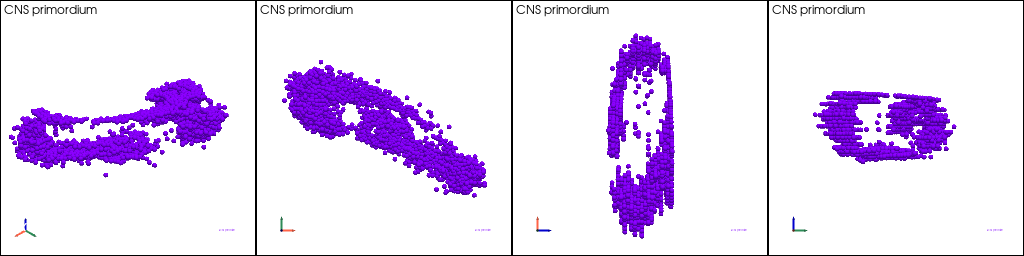

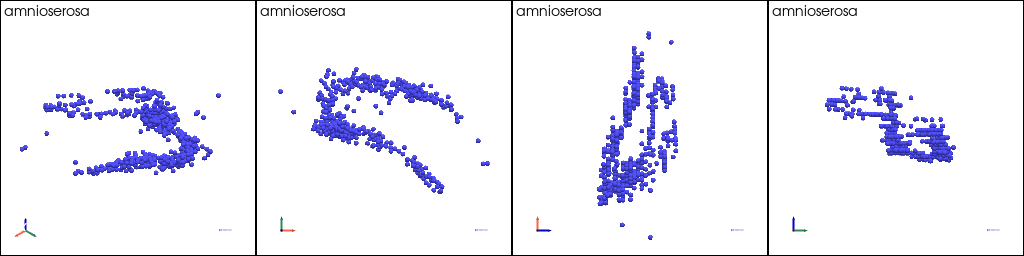

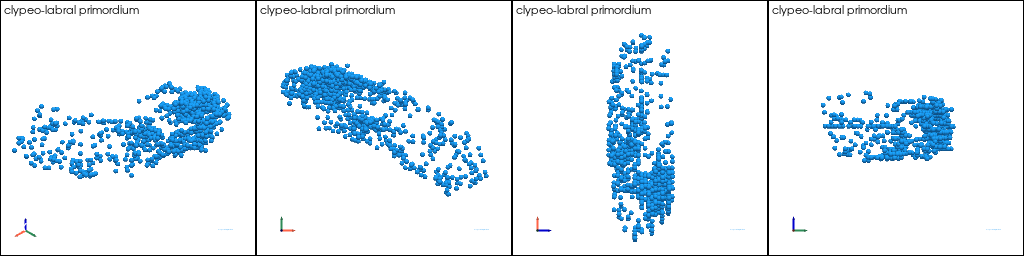

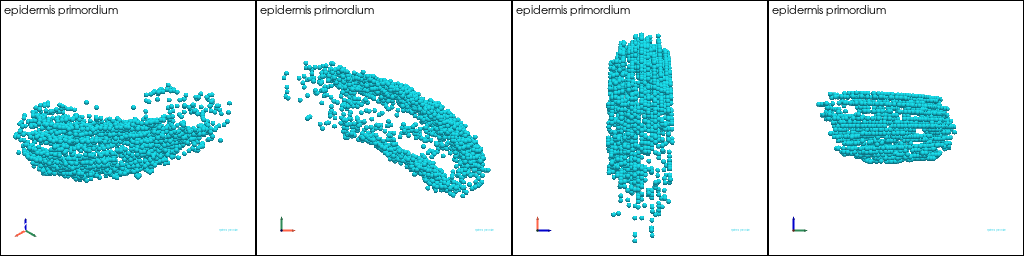

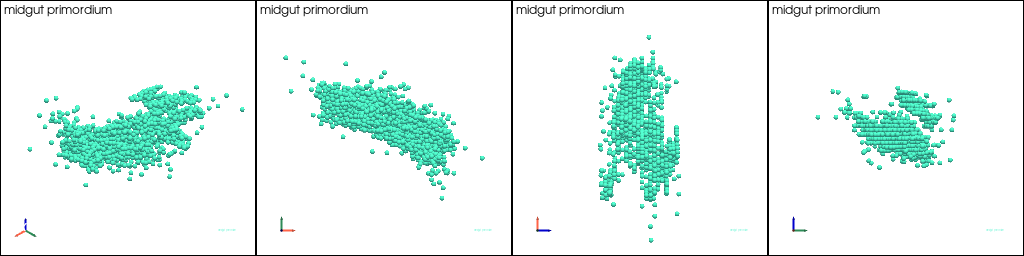

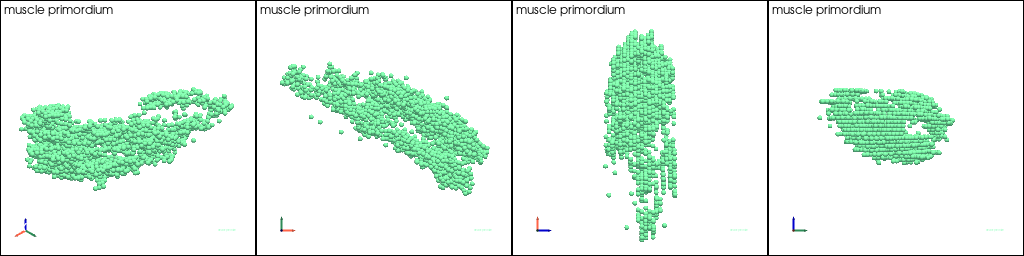

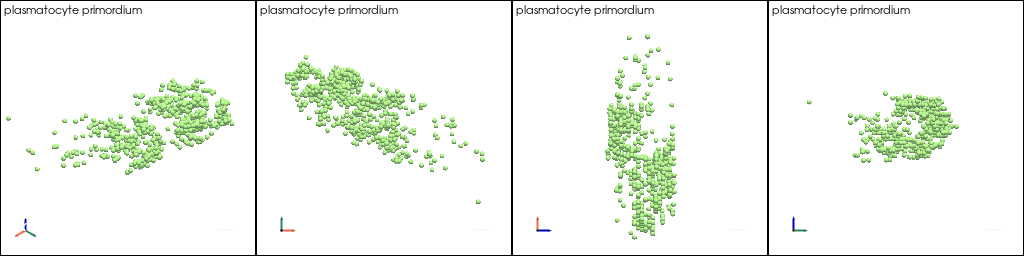

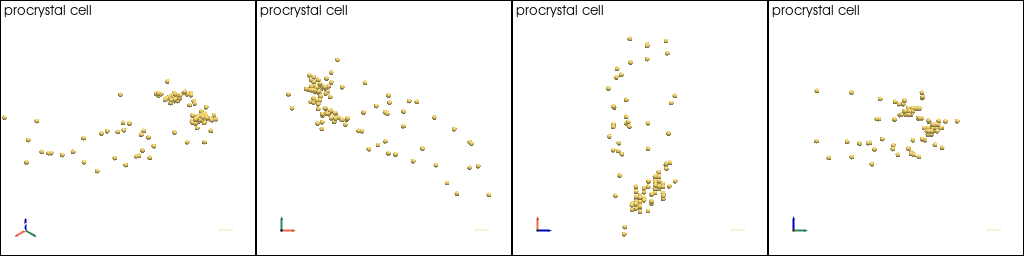

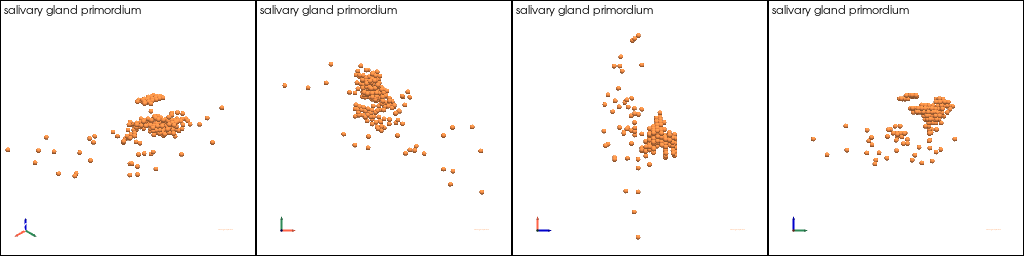

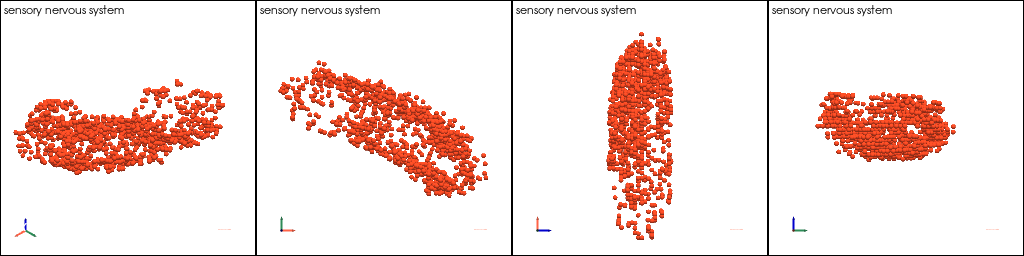

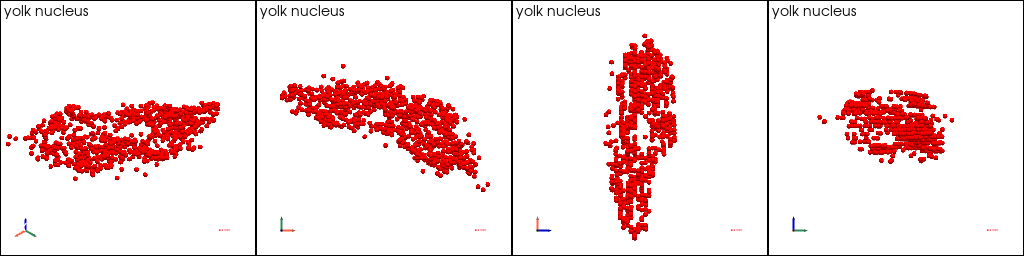

In [7]:
# tissues in groups
tissues = np.asarray(wb_pc.point_data["groups"])
unique_tissues = np.unique(tissues)

# Visualization
def visualization(mesh, tissue_name, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=mesh, key="groups")
        st.pl.add_legend(plotter=p, mesh=mesh, key="groups")
        p.add_axes()
        p.add_text(tissue_name, color="black", font_size=8)
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

tissues_pc = []
for tissue in unique_tissues:
    # You can interactively select one or more tissues at the same time
    # tissue_pc_block = st.tdr.interactive_pick(mesh=wb_pc, key="groups")
    # tissue_pc = [mesh for mesh in tissue_pc_block][0]
    # visualization(mesh=tissue_pc, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue}_raw_pc_model.tif"))

    # You can also select the tissues by setting the parameters
    tissue_pc_block = st.tdr.three_d_pick(mesh=wb_pc, key="groups", picked_groups=tissue)
    tissue_pc = [mesh for mesh in tissue_pc_block][0]
    visualization(mesh=tissue_pc, tissue_name=tissue, jupyter=True)
    visualization(mesh=tissue_pc, tissue_name=tissue, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue}_raw_pc_model.tiff"))

    tissues_pc.append(tissue_pc)

### (Optional)Trim the tissue 3D point cloud models

WARNING - 2022-04-24 16:36:38,484 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:37:05,553 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:37:41,421 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-2

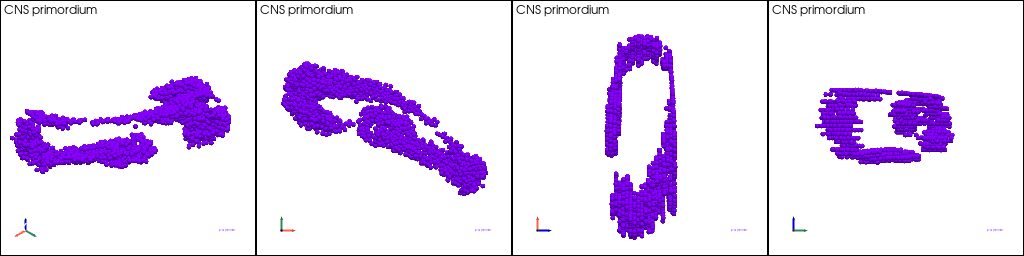

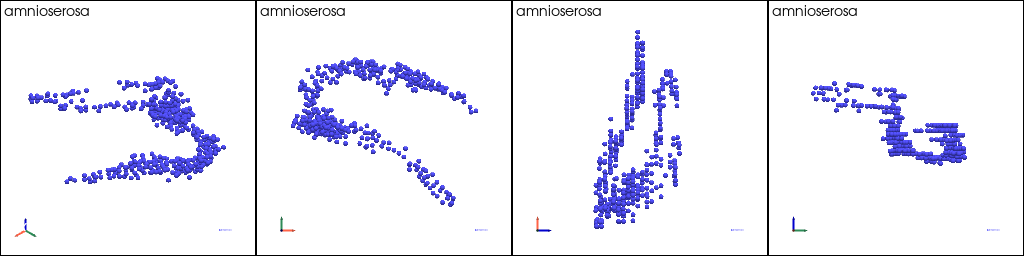

WARNING - 2022-04-24 16:41:55,246 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:42:27,472 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:42:28,058 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-2

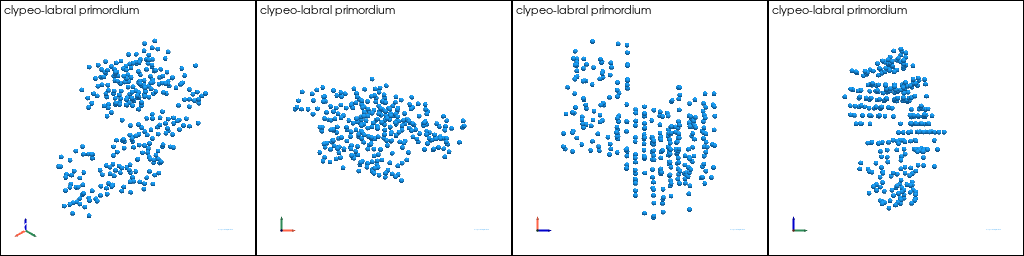

WARNING - 2022-04-24 16:47:40,457 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:47:46,475 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:47:52,919 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-2

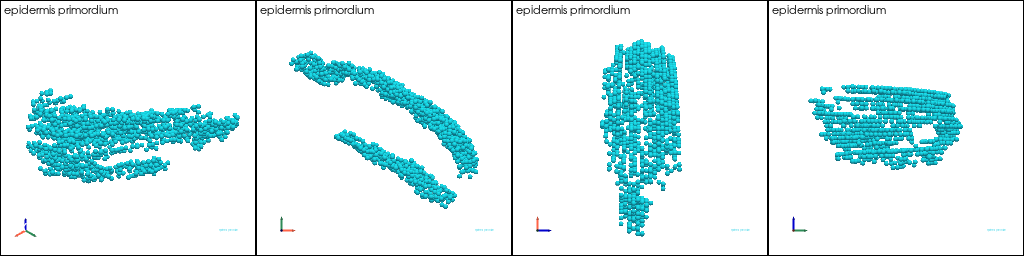

WARNING - 2022-04-24 16:52:13,617 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:52:37,480 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:52:50,805 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-2

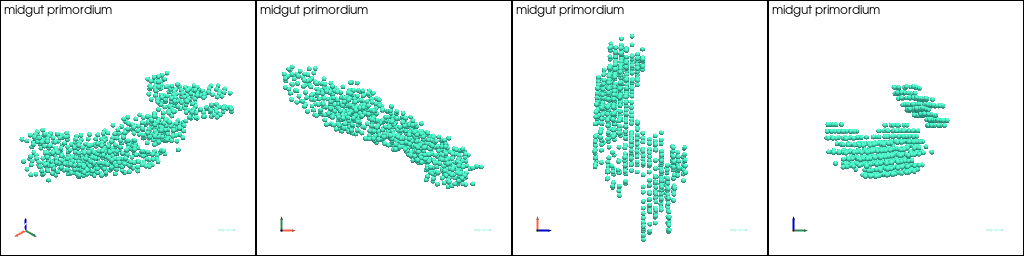

WARNING - 2022-04-24 16:57:26,694 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:58:11,533 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-24 16:58:25,543 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
WARNING - 2022-04-2

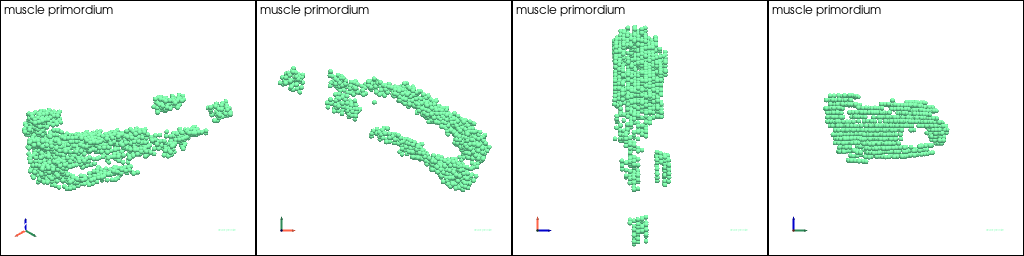

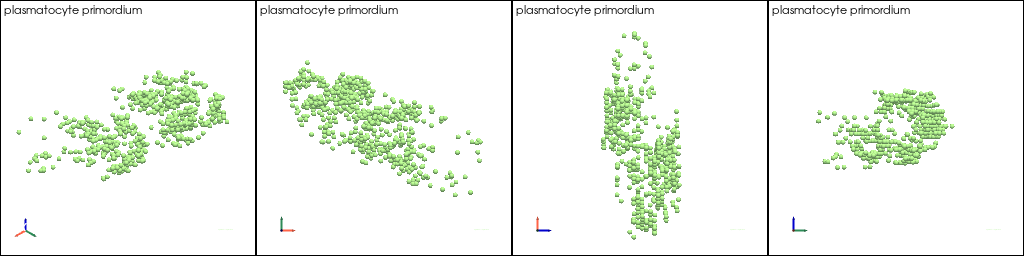

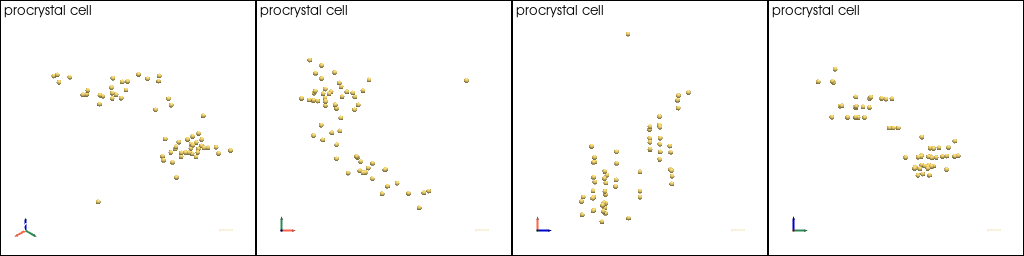

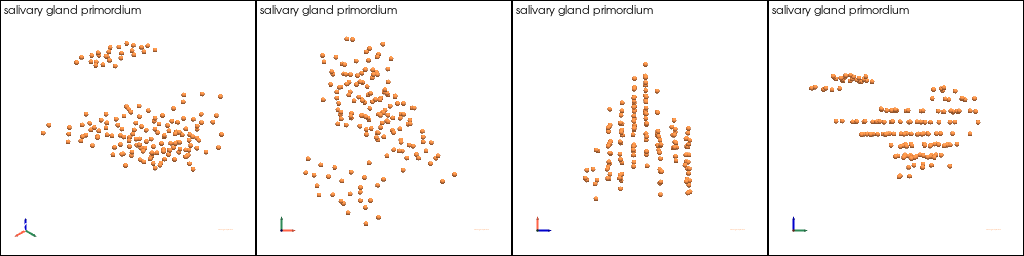

WARNING - 2022-04-24 17:16:39,885 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'


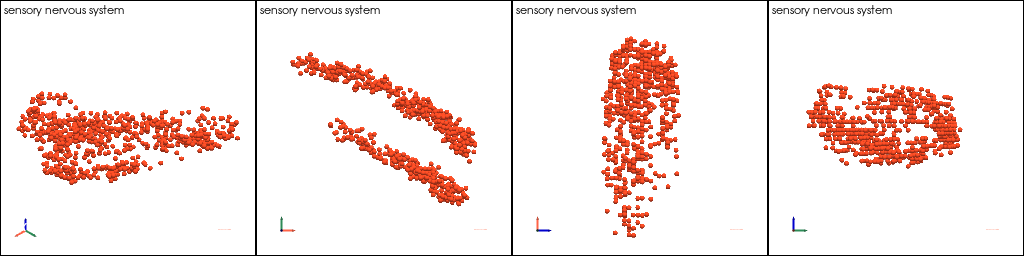

WARNING - 2022-04-24 17:17:03,764 - helpers - Encountered issue in callback (most recent call last):
  File "/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/tools/TDR/weight/clip.py", line 26, in _split_mesh
    if not original_mesh.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'


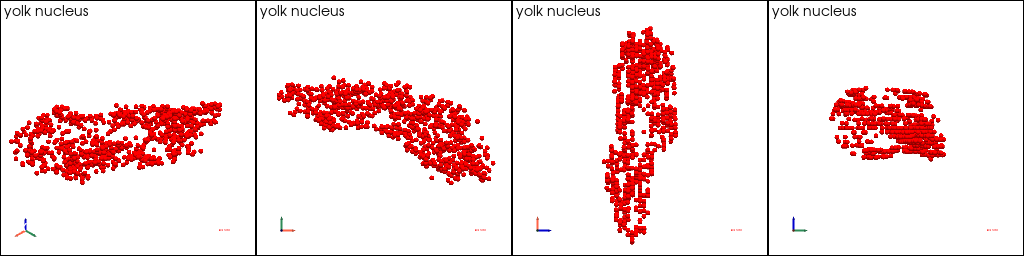

In [9]:
# Trim
trim_tissues_pc = []
for tissue_pc in tissues_pc:
    tissue_name = tissue_pc.point_data["groups"][0]
    trim_pc_block = st.tdr.interactive_rectangle_clip(mesh=tissue_pc, invert=True, bg_mesh=wb_pc)
    trim_pc = [i for i in trim_pc_block][0]
    visualization(mesh=trim_pc, tissue_name=tissue_name, jupyter=True)
    visualization(mesh=trim_pc, tissue_name=tissue_name, jupyter=False,
                  save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue_name}_trim_pc_model.tiff"))

    trim_pc.save(filename=os.path.join(save_cellbin_tdr_mesh_folder, rf"{tissue_name}_trim_pc_model.vtk"))
    trim_tissues_pc.append(trim_pc)


### Construct the surface mesh based on the 3D point cloud

By comparing with the tissue morphology of Drosophila melanogaster in the interactive fly database, we found that muscle, CNS and midgut had relatively
complete tissue morphology. Therefore, here we perform a three-dimensional reconstruction of these three tissues.

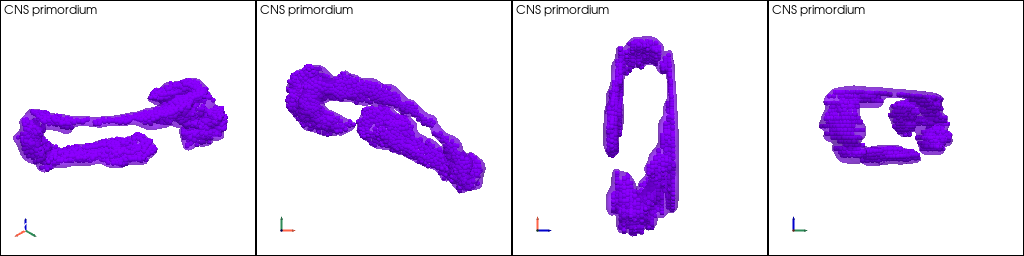

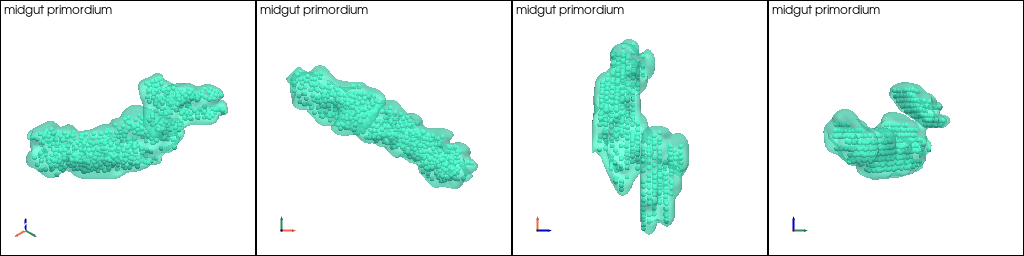

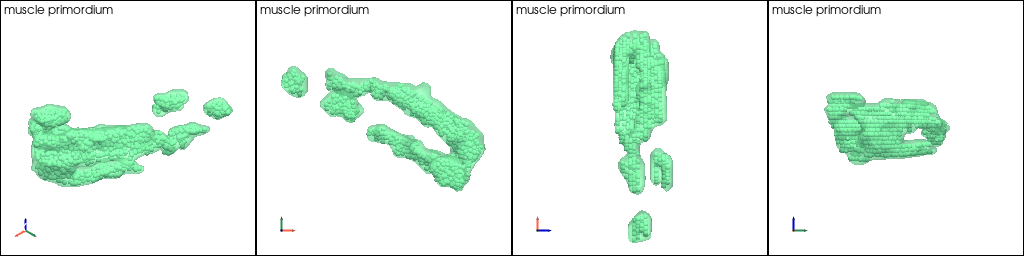

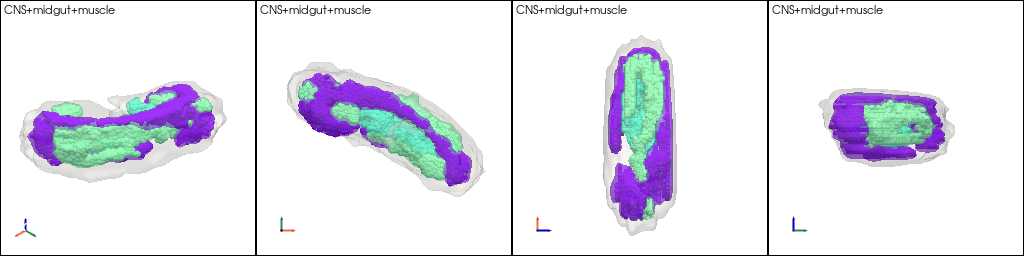

In [32]:
# Visualization
def visualization(pc, surf, tissue_name, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=pc, key="groups", point_size=5.0, mesh_style="points", opacity=1.0)
        st.pl.add_mesh(plotter=p, mesh=surf, key="groups", mesh_style="surface", opacity=0.5)
        p.add_text(tissue_name, color="black", font_size=8)
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

# three tissues surface reconstruction
cns_pc = trim_tissues_pc[0]
midgut_pc = trim_tissues_pc[4]
muscle_pc = trim_tissues_pc[5]

cmm_pc = []
cmm_surf = []
for pc in [cns_pc, midgut_pc, muscle_pc]:
    tissue_name = pc["groups"][0]
    color = pc["groups_rgba"][0]
    tissue_hex = mplc.to_hex(c=color, keep_alpha=True)
    if tissue_name == "midgut primordium":
        tissue_surf, tissue_pc = st.tdr.construct_surface(pc=pc, key_added="groups", cs_method="marching_cube", smooth=1000,
                                                         uniform_pc=False, uniform_pc_alpha=30, color=tissue_hex, alpha=1.0, scale_factor=1.0)
    else:
        tissue_surf, tissue_pc = st.tdr.construct_surface(pc=pc, key_added="groups", cs_method="marching_cube", smooth=1000,
                                                         uniform_pc=True, uniform_pc_alpha=30, color=tissue_hex, alpha=1.0, scale_factor=1.0)
    tissue_surf["groups"] = np.asarray([tissue_name] * tissue_surf.n_cells)

    visualization(pc=tissue_pc, surf=tissue_surf,tissue_name=tissue_name, jupyter=True)
    visualization(pc=tissue_pc, surf=tissue_surf, tissue_name=tissue_name, jupyter=False,
                  save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue_name}_surface_model.tiff"))

    st.tdr.save_mesh(mesh=tissue_pc, filename=os.path.join(save_cellbin_tdr_mesh_folder, f"{tissue_name}_pc_model.vtk"))
    st.tdr.save_mesh(mesh=tissue_surf, filename=os.path.join(save_cellbin_tdr_mesh_folder, f"{tissue_name}_surface_model.vtk"))
    cmm_pc.append(tissue_pc)
    cmm_surf.append(tissue_surf)

# Merge three tissues models and whole-body surface model
cmm_surf.append(wb_surf)
three_surface_model = st.tdr.collect_mesh(cmm_surf)
three_pc_model = st.tdr.collect_mesh(cmm_pc)
visualization(pc=three_pc_model, surf=three_surface_model,tissue_name="CNS+midgut+muscle", jupyter=True)
visualization(pc=three_pc_model, surf=three_surface_model, tissue_name="CNS+midgut+muscle", jupyter=False,
              save_image=os.path.join(save_cellbin_tdr_image_folder, f"three_tissues_surface_model.tiff"))


### Construct the volume based on the surface mesh

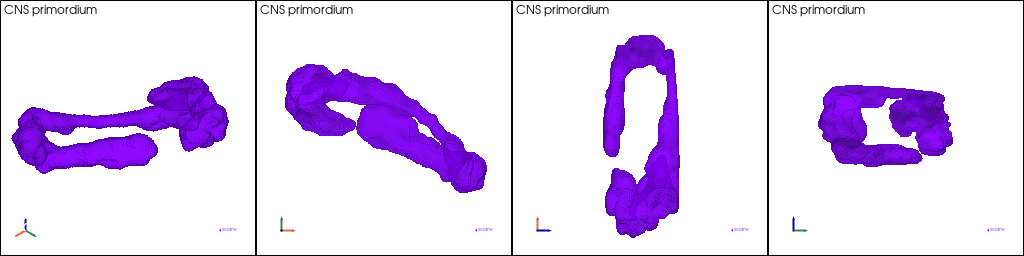

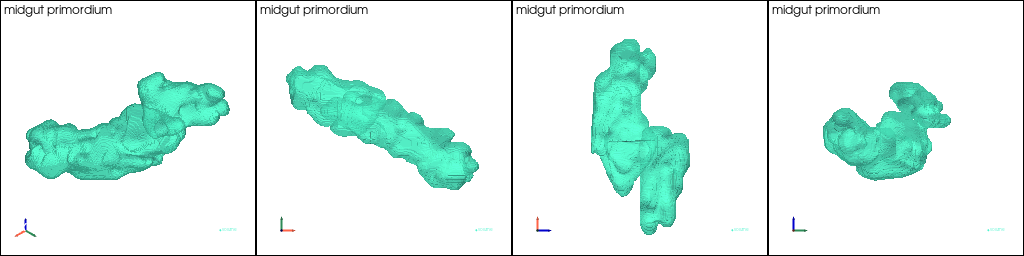

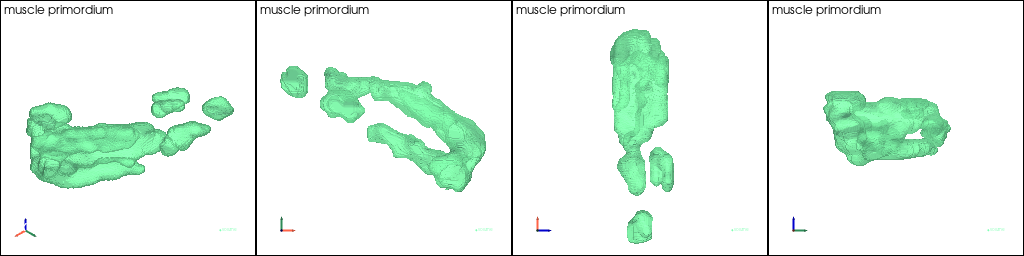

In [33]:
# Visualization
def visualization(tissue_name, jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=volume, key="groups")
        st.pl.add_legend(plotter=p, mesh=volume, key="groups")
        p.add_text(tissue_name, color="black", font_size=8)
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

for surf in cmm_surf[:3]:
    tissue_name = surf["groups"][0]
    color = surf["groups_rgba"][0]
    tissue_hex = mplc.to_hex(c=color, keep_alpha=True)

    volume = st.tdr.construct_volume(surf=surf, key_added="groups", volume_smoothness=300, color=tissue_hex)

    visualization(tissue_name=tissue_name, jupyter=True)
    visualization(tissue_name=tissue_name, jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, f"{tissue_name}_volume_model.tiff"))

    st.tdr.save_mesh(mesh=volume, filename=os.path.join(save_cellbin_tdr_mesh_folder, f"{tissue_name}_volume_model.vtk"))